In [1]:
from pathlib import Path

import pandas as pd
import json

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import requests

In [90]:
query = """
    query {
        votes (
            first: 1000
            skip: $skip
            where: {
              proposal: "0x3ae4c725f7cb82d450b6fe8517178b2a0a51d1105beaad0adb421df1bc8f8cc4"
            }
            orderBy: "created",
            orderDirection: desc
        ) {
            id
            voter
            vp
            vp_state
            created
            choice
        }
}"""

In [92]:
votes = []

for skip in range(0, 6000, 1000):
    url = 'https://hub.snapshot.org/graphql/'
    r = requests.post(url, json={'query': query.replace("$skip", str(skip)), 'variables': {'skip': skip}})
    print(r.status_code)
    json_data = json.loads(r.text)["data"]["votes"]
    votes += json_data

200
200
200
200
200
200


In [93]:
df = pd.DataFrame(votes)

In [142]:
df.sort_values("created", inplace=True)
df.reset_index(inplace=True, drop=True)

In [143]:
df

,level_0,index,id,voter,vp,vp_state,created,choice
0,0,5999,0xa7b478c1dc1b0fc116547e72fd7045e0290f1a2f5ee3...,0x3978c10FD1c7495F544D6388fec493d18E614078,22.000000,final,1681114726,1
1,1,5998,0x55d73c8fe33c2d4224eef3775e8fdb81a28736fe7e85...,0x442Ba6723bAb7218CEff3F4611C5eEA43c23896d,2.472200,final,1681114733,1
2,2,5997,0x833639294ccc9571e996acc50caa236c2bea8400a2e7...,0xAfc47D611c5BDEE7D187aF5Ac2Bb2DEC71750eBa,14.000000,final,1681114738,1
3,3,5996,0x695a348d07c3843b1ae59ea5c454a5be4791879d66ff...,0xde51a09a67F01d1cdAe160Cb3CEf170E99e1F4Ab,1.288817,final,1681114743,3
4,4,5995,0xb3985785320b1a7f79e851020446232ac290b73d1578...,0x2b4cac773034850439ddA9Af3e788BE2DA3E55f1,80.000000,final,1681114745,1
...,...,...,...,...,...,...,...,...
5995,5995,4,0xc98ff3248affd40882a2678889243726dce650f5ad62...,0x69a81DedD2dd35d0E0fd8aa941C5116161146F2c,2.000000,final,1681162427,2
5996,5996,3,0x7bea17d33cc643eecbec5b98cc35c7d1214e7649e1b1...,0x55a64B540C156de7fb376284658484Be704e0dEc,3.115000,final,1681162429,2
5997,5997,2,0xc53f4c8839b36841c2cca69ad93a7e0bedc74a2b46e3...,0x48ABa670a56eb67db849A9B8b6EfAac2c18Cc6AF,0.180000,final,1681162437,1
5998,5998,1,0xc2b4c1885b10500ec7461242bbc8e2d559c62a5fb4af...,0x96Ee4b39571666B2A8c1cc94DC2c50F5931ddc7E,2.000000,final,1681162440,3


In [112]:
sns.set_theme()

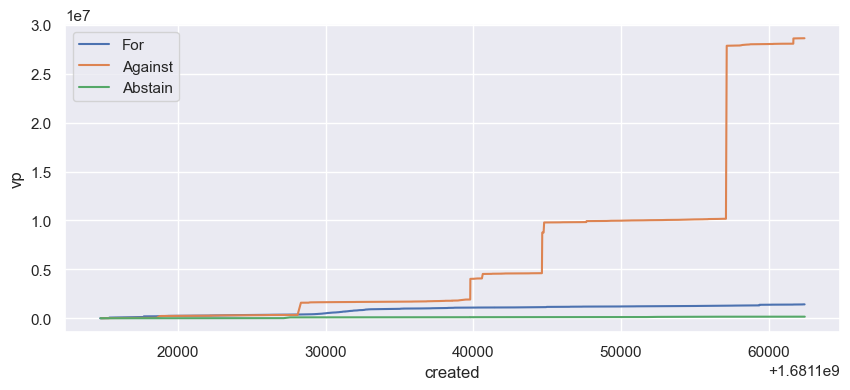

In [149]:
fig, ax = plt.subplots(nrows=1, figsize=(10,4))

keys = {"1": "For", "2": "Against", "3": "Abstain"}

for key, grp in df.groupby("choice"):
    sns.lineplot(data=grp, x="created", y=grp["vp"].cumsum(), label=keys[str(key)], ax=ax)

#ax.set_yscale("log")

17698172.70465703

In [238]:
max_vp = df["vp"].max()
vp_step = df["vp"].max() // 100000
voting_power = np.arange(1, max_vp, vp_step)

percent_votes_against = np.empty(len(voting_power))
percent_votes_against[:] = np.nan
percent_votes_for = np.empty(len(voting_power))
percent_votes_for[:] = np.nan
percent_votes_abstain = np.empty(len(voting_power))
percent_votes_abstain[:] = np.nan

for idx, vp in enumerate(voting_power):
    within_vp_step = (df["vp"] > vp) & (df["vp"] < vp + vp_step)
    if len(df[within_vp_step]) != 0:
        percent_votes_for[idx] = len(df[within_vp_step & (df["choice"] == 1)]) / len(df[within_vp_step]) * 100
        percent_votes_against[idx] = len(df[within_vp_step & (df["choice"] == 2)]) / len(df[within_vp_step]) * 100
        percent_votes_abstain[idx] = len(df[within_vp_step & (df["choice"] == 3)]) / len(df[within_vp_step]) * 100

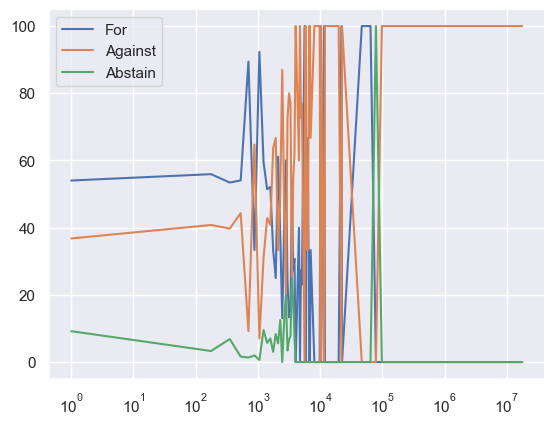

In [241]:
fig, ax = plt.subplots()

sns.lineplot(x=voting_power, y=percent_votes_for, ax=ax, label="For")
sns.lineplot(x=voting_power, y=percent_votes_against, ax=ax, label="Against")
sns.lineplot(x=voting_power, y=percent_votes_abstain, ax=ax, label="Abstain")
#sns.lineplot(x=voting_power, y=percent_votes_for + percent_votes_against + percent_votes_abstain, ax=ax, label="Abstain")

#ax.get_legend().remove()
ax.legend()

ax.set_xscale("log")

In [181]:
len(percent_votes_for)

500

In [33]:
a = np.ones((5, 4))

In [34]:
a

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [35]:
np.mean(a, axis=1).T.shape

(5,)

In [36]:
(a.shape[0], 1)

(5, 1)

In [37]:
a.shape

(5, 4)

In [38]:
a -= np.tile(np.mean(a, axis=1).T, (a.shape[1], 1)).T

In [39]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [63]:
a = np.ones((5, 4))

In [64]:
s = np.mean(a, axis=1)
i = np.arange(s.shape[0])
fit = np.polyfit(i, s, 1)

a -= np.tile(np.polyval(fit, i).reshape(a.shape[0], 1), a.shape[1])

In [65]:
a

array([[4.44089210e-16, 4.44089210e-16, 4.44089210e-16, 4.44089210e-16],
       [4.44089210e-16, 4.44089210e-16, 4.44089210e-16, 4.44089210e-16],
       [4.44089210e-16, 4.44089210e-16, 4.44089210e-16, 4.44089210e-16],
       [4.44089210e-16, 4.44089210e-16, 4.44089210e-16, 4.44089210e-16],
       [3.33066907e-16, 3.33066907e-16, 3.33066907e-16, 3.33066907e-16]])